In [12]:
#Primera entrega Proyecto Data Science I

#Maritza Quintero Siritt

#Introducción al Proyecto
#En el mundo financiero, los bancos obtienen una parte significativa de sus ingresos mediante la concesión de préstamos. 
#Sin embargo, este proceso está inherentemente asociado con riesgos, ya que los prestatarios pueden incumplir el pago de sus préstamos. 
#Para mitigar este problema y mejorar la toma de decisiones, los bancos han decidido utilizar técnicas de Aprendizaje Automático. 
#El objetivo es desarrollar un modelo predictivo robusto que pueda evaluar la probabilidad de que un nuevo prestatario incumpla con sus pagos, 
#proporcionando así una herramienta valiosa para la gestión del riesgo crediticio.

#Descripción del Problema
#El incumplimiento de préstamos es un problema crítico para las instituciones financieras, ya que puede resultar en pérdidas financieras 
#significativas y afectar su estabilidad. Identificar los factores que influyen en el incumplimiento de préstamos y desarrollar modelos predictivos 
#precisos es crucial para la toma de decisiones fundamentadas en la gestión del riesgo crediticio. 
#Este proyecto se enfoca en utilizar datos históricos sobre prestatarios de préstamos para construir un modelo de clasificación que prediga la 
#probabilidad de incumplimiento.

#Objetivos
#Comprensión y Limpieza del conjunto de datos proporcionado.
#Realizar un análisis exploratorio de datos para comprender mejor las características y patrones presentes en el conjunto de datos.
#Desarrollar un modelo predictivo para evaluar la rentabilidad de los préstamos para el prestamista, basándose en factores como el perfil del 
#prestatario y las características del préstamo.
#Proporcionar a los prestamistas una herramienta para tomar decisiones informadas y mitigar los riesgos financieros asociados con la concesión 
#de préstamos.

#Hipotesis
#Se plantea que al analizar los atributos de los préstamos, como el monto, el tipo y el propósito del préstamo, así como la solvencia crediticia 
#del prestatario, junto con otros factores relevantes, se podrá desarrollar un modelo de Aprendizaje Automático bien ajustado que pueda  
#predecir con alta precisión si un prestatario incumplirá su préstamo.
#El modelo proporcionando información valiosa para la toma de decisiones estratégicas, mejorando la capacidad del banco para evaluar la rentabilidad 
#de los préstamos y el riesgo crediticio. 

In [3]:
#Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Carga de archivo
Data = pd.read_csv('Loan_Default.csv', delimiter=',', encoding='latin1')

In [5]:
#Preview de Datos Cargados
Data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [5]:
#Exploracion del detalle y tipo de datos
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [13]:
#El conjunto de datos contiene varias columnas relacionadas con préstamos, como detalles del préstamo, demografía del prestatario, 
#puntajes de crédito y estados del préstamo. Aquí hay una breve descripción de las columnas y los datos que contienen:

#1.	ID: Identificador único para cada préstamo.
#2.	year: Año de la solicitud de préstamo.
#3.	loan_limit: Categoría del límite del préstamo.
#4.	Gender: Género del solicitante.
#5.	approv_in_adv: Indica si el préstamo fue preaprobado.
#6.	loan_type: Tipo de préstamo.
#7.	loan_purpose: Propósito del préstamo.
#8.	Credit_Worthiness: Categoría de solvencia crediticia.
#9.	open_credit: Estado de crédito abierto.
#10. business_or_commercial: Indica si el préstamo es para fines comerciales o de negocio.
#11. loan_amount: Monto del préstamo.
#12. rate_of_interest: Tasa de interés.
#13. Interest_rate_spread: Diferencial de la tasa de interés.
#14. Upfront_charges: Cargos iniciales.
#15. term: Plazo del préstamo en meses.
#16. Neg_ammortization: Indica si hay amortización negativa.
#17. interest_only: Indica si es solo interés.
#18. lump_sum_payment: Indica si hay pago de suma global.
#19. property_value: Valor de la propiedad.
#20. construction_type: Tipo de construcción.
#21. occupancy_type: Tipo de ocupación.
#22. Secured_by: Garantía del préstamo.
#23. total_units: Unidades totales.
#24. income: Ingreso del solicitante.
#25. credit_type: Tipo de crédito.
#26. Credit_Score: Puntaje de crédito del solicitante.
#27. co-applicant_credit_type: Tipo de crédito del co-solicitante.
#28. age: Rango de edad del solicitante.
#29. submission_of_application: Tipo de presentación de la solicitud.
#30. LTV: Relación préstamo-valor (Loan-to-Value ratio).
#31. Region: Región del solicitante.
#32. Security_Type: Tipo de garantía del préstamo.
#33. Status: Estado del préstamo (por ejemplo, incumplido o no).
#34. dtir1: Relación deuda-ingreso (Debt-to-Income ratio).
#Cada columna contiene datos que describen diferentes aspectos del préstamo y del solicitante, permitiendo un análisis integral para evaluar riesgos 
#y tomar decisiones financieras.

In [8]:
#Verificar la existencia de valores duplicados
Data.duplicated().value_counts()

False    148670
Name: count, dtype: int64

In [ ]:
#La Data no muestra duplicados.

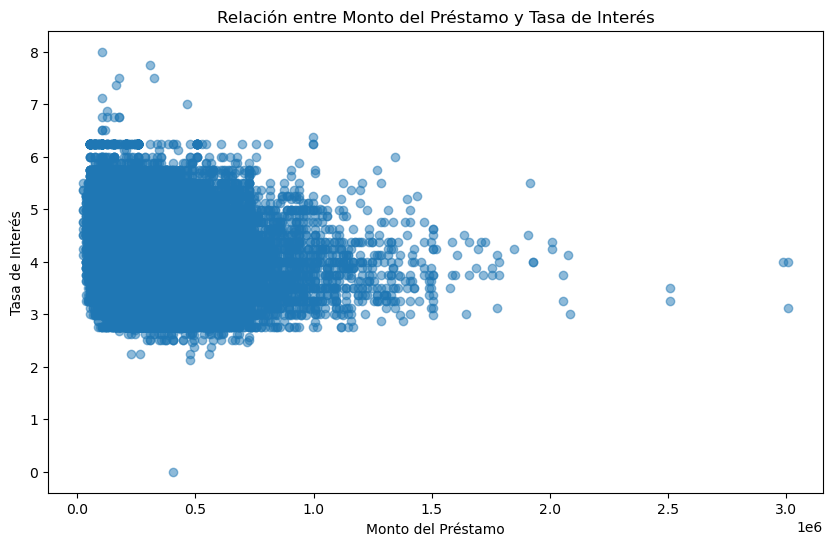

In [24]:
# Diagrama de dispersión entre loan_amount y rate_of_interest
plt.figure(figsize=(10, 6))
plt.scatter(Data['loan_amount'], Data['rate_of_interest'], alpha=0.5)
plt.title('Relación entre Monto del Préstamo y Tasa de Interés')
plt.xlabel('Monto del Préstamo')
plt.ylabel('Tasa de Interés')
plt.show()


In [ ]:
#Caracteristicas del prestamo: En el diagrama de dispersión se puede observar la relación entre el monto del préstamo y la tasa de interés.

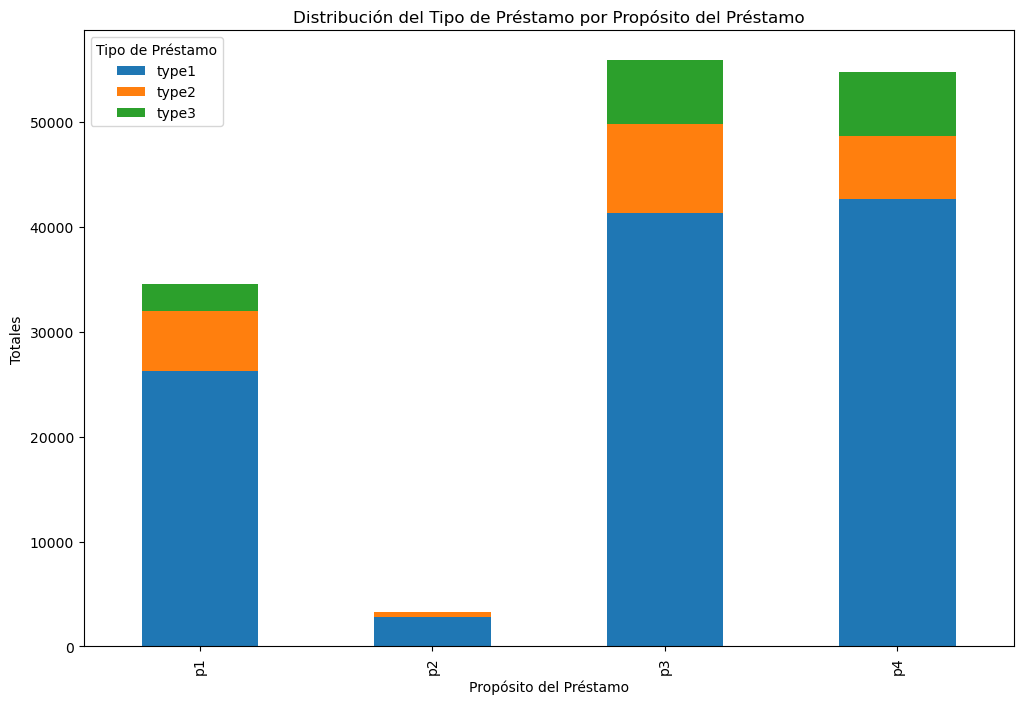

In [95]:
# Contar las combinaciones de loan_purpose y loan_type
loan_purpose_type_counts = Data.groupby(['loan_purpose', 'loan_type']).size().unstack()

# Crear el gráfico de barras apiladas
loan_purpose_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribución del Tipo de Préstamo por Propósito del Préstamo')
plt.xlabel('Propósito del Préstamo')
plt.ylabel('Totales')
plt.legend(title='Tipo de Préstamo')
plt.show()

In [32]:
"""
Se puede visualizar que:
El Tipo de Prestamo 1 es el mas solicitado de todos los Tipos de Prestamos.
Los propositos de prestamos 3 y 4 son los mas solicitados y el Proposito 2 el menos solicitado.
"""

'Se puede visualizar que:\nEl Tipo de Prestamo 1 es el mas solicitado de todos los Tipos de Prestamos.\nLos propositos de prestamos 3 y 4 son los mas solicitados y el Proposito 2 el menos solicitado.'

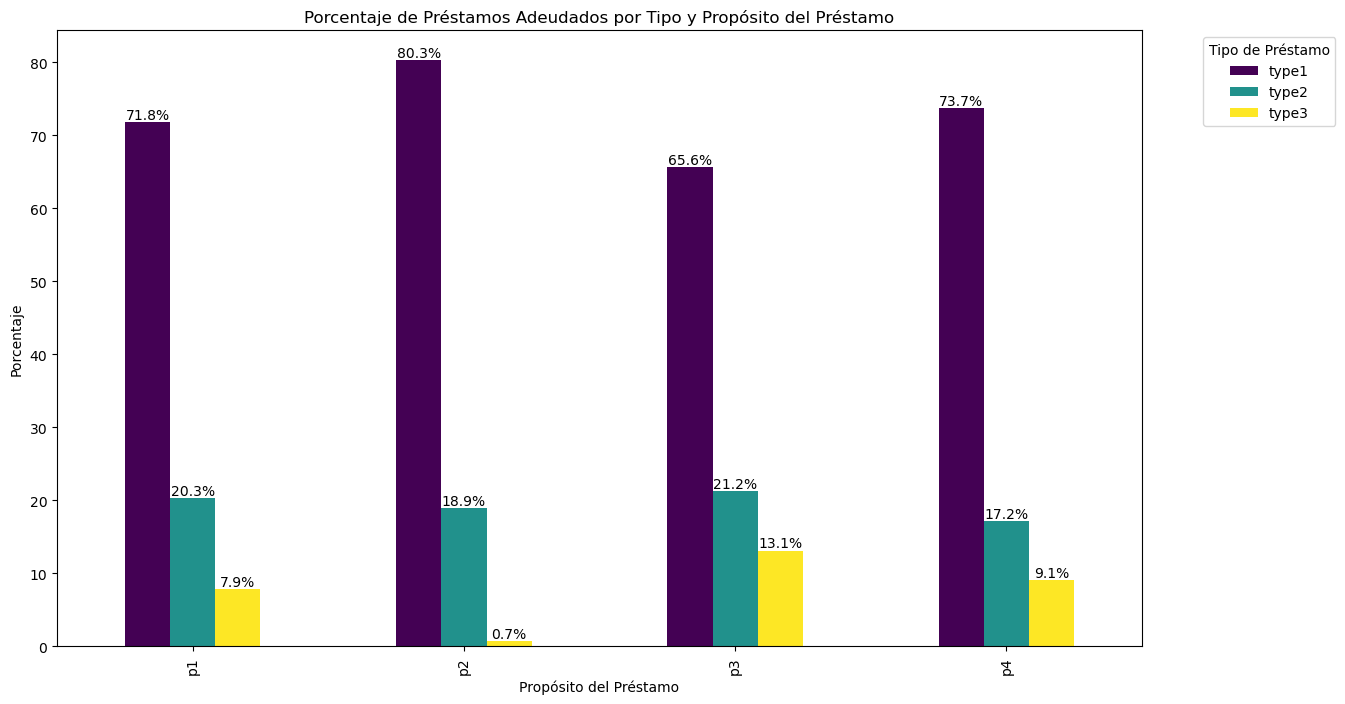

In [35]:
# Filtrar los préstamos adeudados
loans_defaulted = Data[Data['Status'] == 1]

# Contar las combinaciones de loan_purpose y loan_type para préstamos adeudados
defaulted_purpose_type_counts = loans_defaulted.groupby(['loan_purpose', 'loan_type']).size().unstack()

# Calcular los porcentajes
defaulted_purpose_type_percentages = defaulted_purpose_type_counts.div(defaulted_purpose_type_counts.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras agrupadas con porcentajes
ax = defaulted_purpose_type_percentages.plot(kind='bar', figsize=(14, 8), colormap='viridis')

# Agregar etiquetas y título
plt.title('Porcentaje de Préstamos Adeudados por Tipo y Propósito del Préstamo')
plt.xlabel('Propósito del Préstamo')
plt.ylabel('Porcentaje')

# Añadir etiquetas de porcentaje encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.legend(title='Tipo de Préstamo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [32]:
"""
Se puede visualizar que:
El Tipo de Prestamo 1 es el mas solicitado de todos los Tipos de Prestamos.
Pero el que acumula mayor porcentaje de prestamos adeudados.
"""

'Se puede visualizar que:\nEl Tipo de Prestamo 1 es el mas solicitado de todos los Tipos de Prestamos.\nLos propositos de prestamos 3 y 4 son los mas solicitados y el Proposito 2 el menos solicitado.'

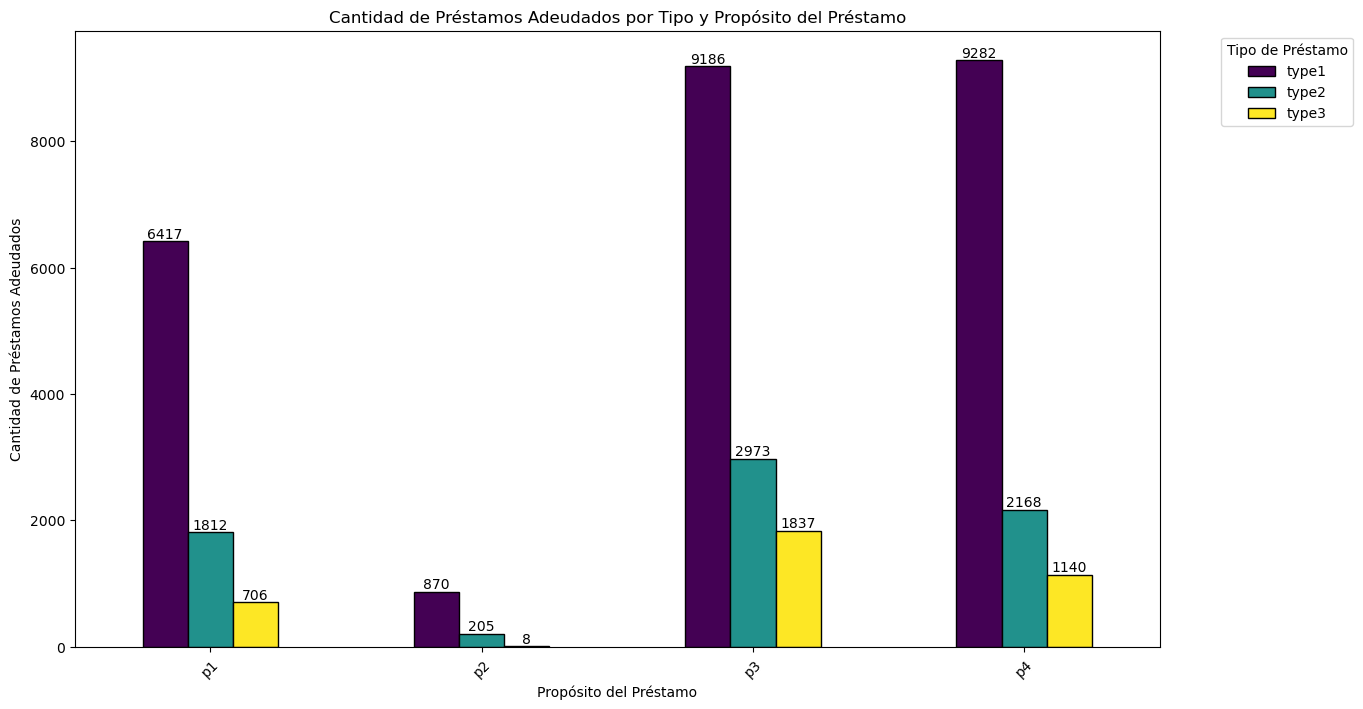

In [41]:
# Filtrar los préstamos adeudados
loans_defaulted = Data[Data['Status'] == 1]

# Contar las combinaciones de tipo de préstamo y propósito del préstamo para préstamos adeudados
defaulted_counts = loans_defaulted.groupby(['loan_purpose', 'loan_type']).size().unstack()

# Crear el gráfico de barras agrupadas con cantidades
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfica de barras agrupadas
defaulted_counts.plot(kind='bar', ax=ax, colormap='viridis', edgecolor='black')

# Añadir etiquetas de cantidad encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Agregar etiquetas y título
plt.title('Cantidad de Préstamos Adeudados por Tipo y Propósito del Préstamo')
plt.xlabel('Propósito del Préstamo')
plt.ylabel('Cantidad de Préstamos Adeudados')
plt.legend(title='Tipo de Préstamo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

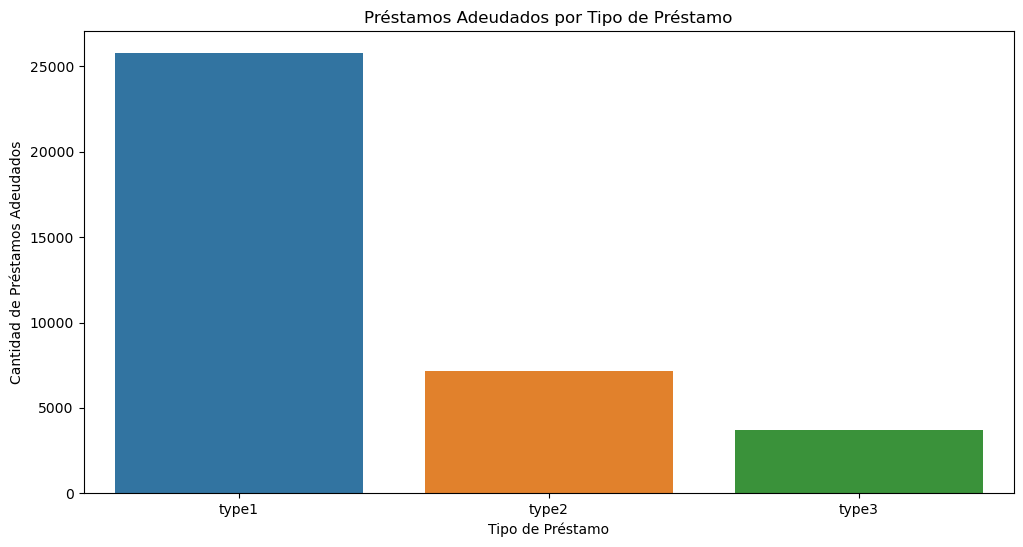

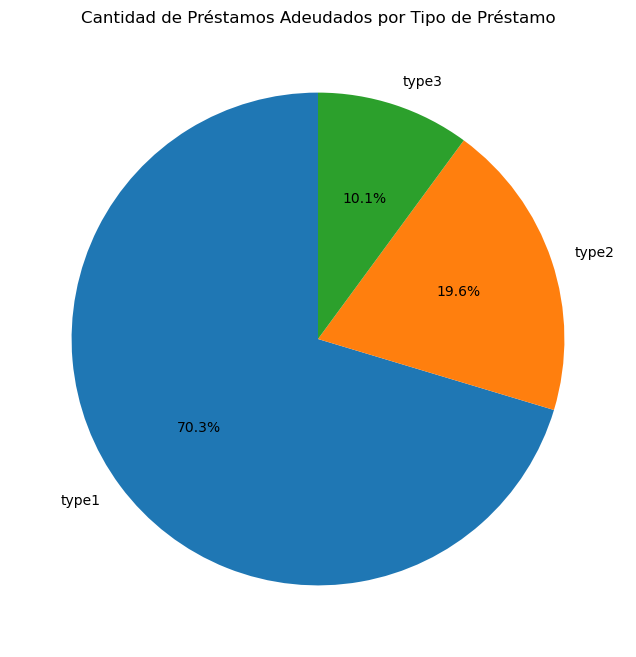

In [107]:
# Filtrar los préstamos adeudados
loans_defaulted = Data[Data['Status'] == 1]

# Countplot de tipo de préstamo
plt.figure(figsize=(12, 6))
sns.countplot(data=loans_defaulted, x='loan_type', order=loans_defaulted['loan_type'].value_counts().index)
plt.title('Préstamos Adeudados por Tipo de Préstamo')
plt.xlabel('Tipo de Préstamo')
plt.ylabel('Cantidad de Préstamos Adeudados')
#plt.show()

# Filtrar los préstamos adeudados
#loans_defaulted = Data[Data['Status'] == 1]

# Contar las combinaciones de tipo de préstamo para préstamos adeudados
defaulted_type_counts = loans_defaulted['loan_type'].value_counts()

# Crear el gráfico de torta con cantidades
plt.figure(figsize=(10, 8))
plt.pie(defaulted_type_counts, labels=defaulted_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Cantidad de Préstamos Adeudados por Tipo de Préstamo')

plt.show()

In [ ]:
"""
El tipo de prestamo 1 suma sobre el 70% de los prestamos adeudados.
"""

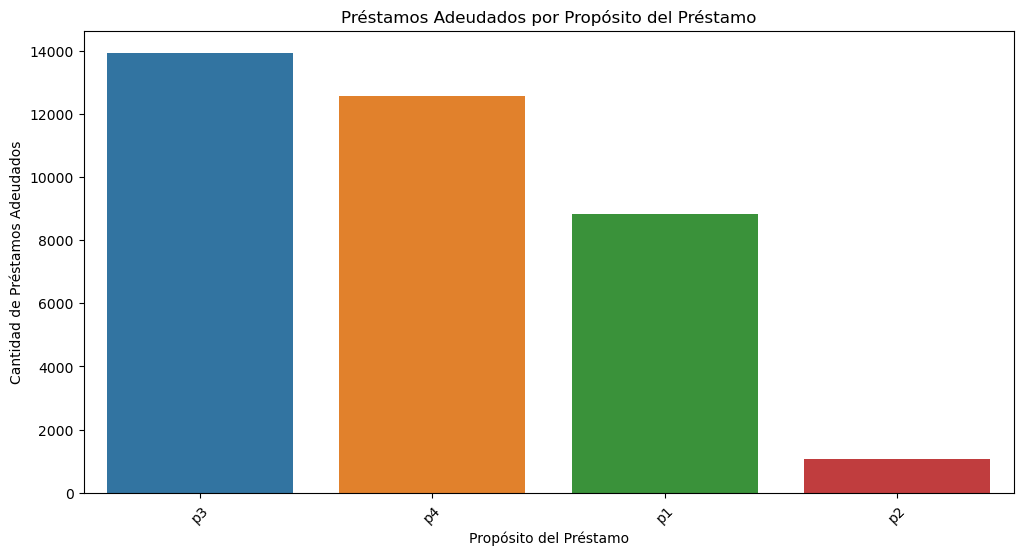

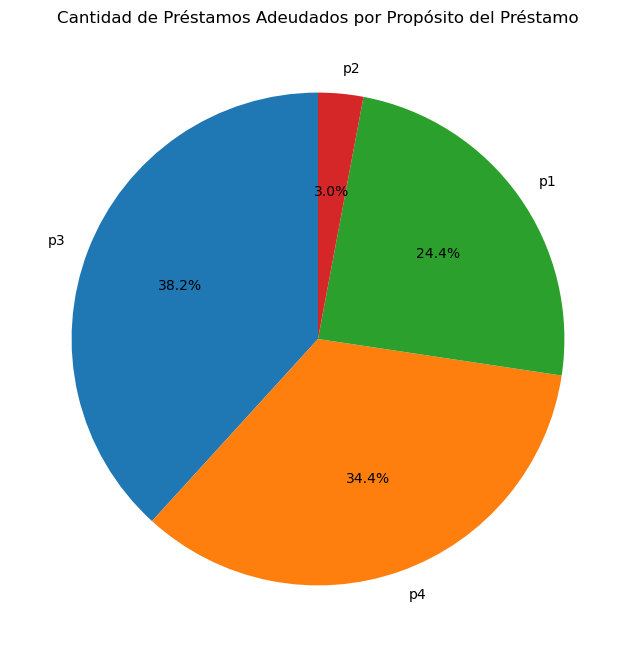

In [99]:
plt.figure(figsize=(12, 6))
sns.countplot(data=loans_defaulted, x='loan_purpose', order=loans_defaulted['loan_purpose'].value_counts().index)
plt.title('Préstamos Adeudados por Propósito del Préstamo')
plt.xlabel('Propósito del Préstamo')
plt.ylabel('Cantidad de Préstamos Adeudados')
plt.xticks(rotation=45)
plt.show()

# Filtrar los préstamos adeudados
loans_defaulted = Data[Data['Status'] == 1]

# Contar las combinaciones de propósito del préstamo para préstamos adeudados
defaulted_purpose_counts = loans_defaulted['loan_purpose'].value_counts()

# Crear el gráfico de torta con cantidades
plt.figure(figsize=(10, 8))
plt.pie(defaulted_purpose_counts, labels=defaulted_purpose_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Cantidad de Préstamos Adeudados por Propósito del Préstamo')

plt.show()

In [ ]:
"""
Los propositos de prestamos P3 y P4 suman sobre el 70% de los prestamos adeudados.
"""

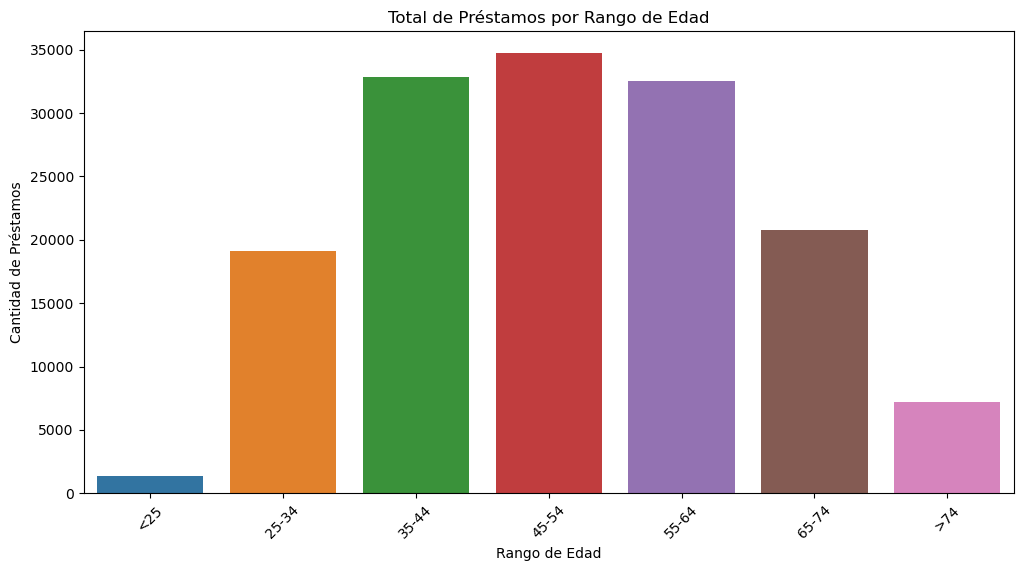

In [87]:
# Filtrar los préstamos totales (eliminar filas con valores nulos en la columna 'age')
loans_total = Data.dropna(subset=['age'])

# Ajustar el orden de los rangos de edad para que '<25' sea el primero a la izquierda
#age_order = sorted(loans_defaulted['age'].unique())
age_order_total = ['<25'] + sorted([age for age in loans_total['age'].unique() if age != '<25'])

# Visualizar Total de Préstamos por Rango de Edad
plt.figure(figsize=(12, 6))
sns.countplot(data=loans_total, x='age', order=age_order_total)
plt.title('Total de Préstamos por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Préstamos')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Podemos observar que la mayor cantidad de prestamos es otorga para el rango de edad entre: 35 a 64 años.

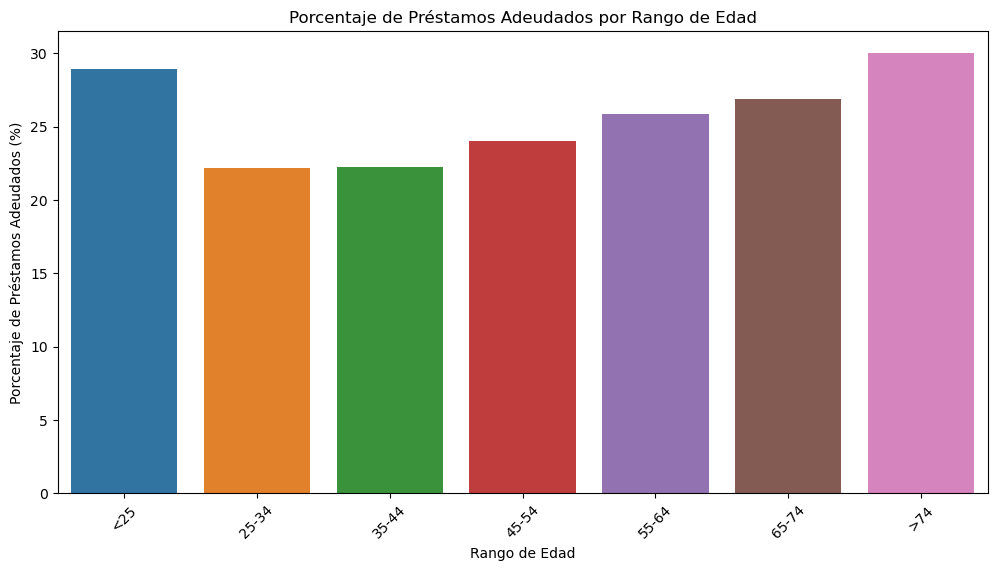

In [86]:
# Filtrar los préstamos adeudados y totales
loans_defaulted = Data[Data['Status'] == 1].dropna(subset=['age'])
loans_total = Data.dropna(subset=['age'])

# Ajustar el orden de los rangos de edad para que '<25' sea el primero a la izquierda
age_order_total = ['<25'] + sorted([age for age in loans_total['age'].unique() if age != '<25'])

# Contar los préstamos totales y los adeudados por rango de edad
total_counts = loans_total['age'].value_counts().reindex(age_order_total).fillna(0)
defaulted_counts = loans_defaulted['age'].value_counts().reindex(age_order_total).fillna(0)

# Calcular los porcentajes de préstamos adeudados sobre el total de préstamos por rango de edad
percent_defaulted = (defaulted_counts / total_counts) * 100

# Crear un DataFrame con los resultados en porcentajes
percent_df = pd.DataFrame({'Porcentaje de Préstamos Adeudados': percent_defaulted}).fillna(0)

# Visualizar la relación con un gráfico de barras en porcentajes
plt.figure(figsize=(12, 6))
sns.barplot(x=percent_df.index, y=percent_df['Porcentaje de Préstamos Adeudados'])
plt.title('Porcentaje de Préstamos Adeudados por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Porcentaje de Préstamos Adeudados (%)')
plt.xticks(rotation=45)
plt.show()

In [88]:
#Sin embargo, revisando la relacion entre el total de prestamos otorgados y la cantidad de prestamos adeudados, 
#podemos observar que el rango de edad con mas baja tasa de deuda esta entre: 25 a 54 años de edad.
#Se pudiera plantear un ajuste para la preferencia en el otorgamiento de prestamos a un rango de edad entre los 35 a 54 años de edad.

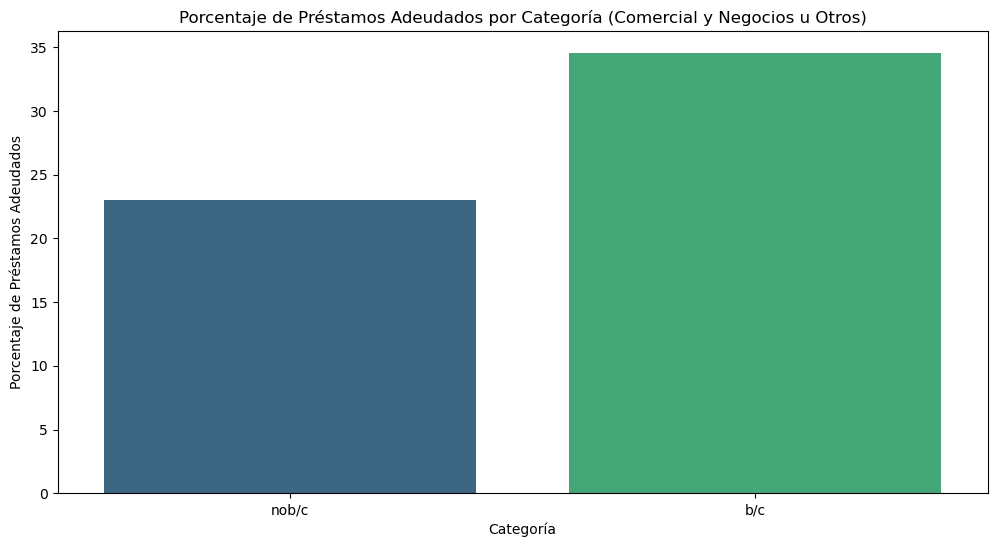

In [94]:
# Contar los préstamos por categoría business_or_commercial y estado de deuda
total_loans = Data['business_or_commercial'].value_counts()
defaulted_loans = Data[Data['Status'] == 1]['business_or_commercial'].value_counts()

# Calcular los porcentajes
percent_defaulted = (defaulted_loans / total_loans) * 100

# Crear un DataFrame para facilitar la visualización
df = pd.DataFrame({
    'Total Loans': total_loans,
    'Defaulted Loans': defaulted_loans,
    'Percent Defaulted': percent_defaulted
}).reset_index()

df.columns = ['business_or_commercial', 'Total Loans', 'Defaulted Loans', 'Percent Defaulted']

# Visualización
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='business_or_commercial', y='Percent Defaulted', data=df, palette='viridis')

plt.title('Porcentaje de Préstamos Adeudados por Categoría (Comercial y Negocios u Otros)')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje de Préstamos Adeudados')
plt.show()

In [ ]:
#Se puede observar que los prestamos solicitados para fines comerciales o de negocios presentan una mayor tasa de incumplimiento de pago.
#Esto en comparacion con prestamos solicitados para otros fines.

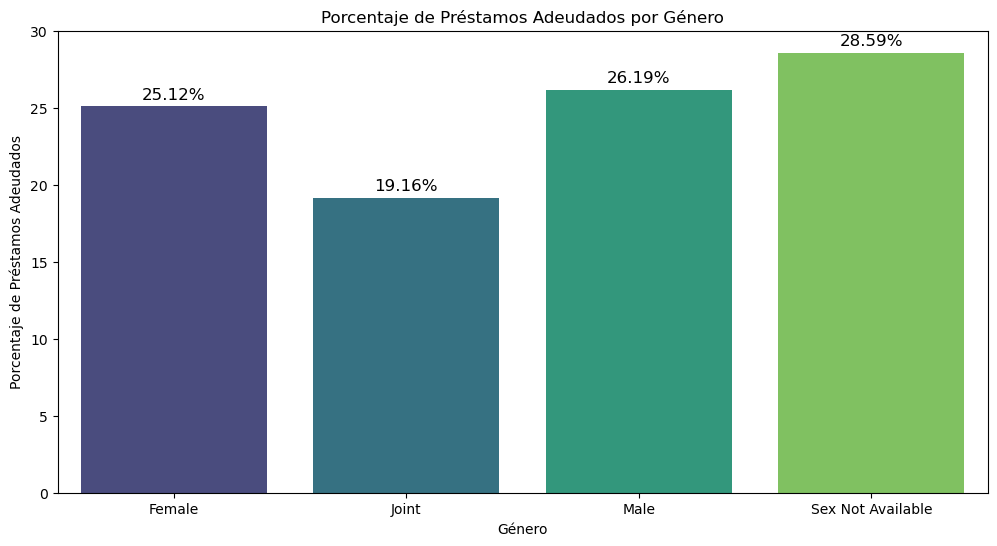

In [97]:
# Contar los préstamos por género y estado de deuda
total_loans_gender = Data['Gender'].value_counts()
defaulted_loans_gender = Data[Data['Status'] == 1]['Gender'].value_counts()

# Calcular los porcentajes
percent_defaulted_gender = (defaulted_loans_gender / total_loans_gender) * 100

# Crear un DataFrame para facilitar la visualización
df_gender = pd.DataFrame({
    'Total Loans': total_loans_gender,
    'Defaulted Loans': defaulted_loans_gender,
    'Percent Defaulted': percent_defaulted_gender
}).reset_index()

df_gender.columns = ['Gender', 'Total Loans', 'Defaulted Loans', 'Percent Defaulted']

# Visualización
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Gender', y='Percent Defaulted', data=df_gender, palette='viridis')

# Agregar etiquetas de porcentaje encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Porcentaje de Préstamos Adeudados por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Préstamos Adeudados')
plt.show()

In [ ]:
#Aunque los porcentajes son muy similares puede observarse que los prestamos otrogados a asociaciones presentan menor probabilidad de incumplimiento 
#de pago.

In [ ]:
"""
Conclusiones iniciales:

-El tipo de prestamo 1 suma sobre el 70% de los prestamos adeudados.

-Los propositos de prestamos P3 y P4 suman sobre el 70% de los prestamos adeudados.

-La mayor cantidad de prestamos es otorga para el rango de edad entre: 35 a 64 años. Revisando la relacion entre el total de prestamos otorgados y 
la cantidad de prestamos adeudados, podemos observar que el rango de edad con mas baja tasa de deuda esta entre: 25 a 54 años de edad. 
Se pudiera plantear un ajuste para la preferencia en el otorgamiento de prestamos a un rango 
de edad entre los 35 a 54 años de edad.

-Los prestamos solicitados para fines comerciales o de negocios presentan una mayor tasa de incumplimiento de pago. Esto en comparacion con prestamos 
solicitados para otros fines.

- Puede observarse que los prestamos otrogados a asociaciones presentan menor probabilidad de incumplimiento de pago.

"""

In [6]:
#Realizar la limpieza del Dataset
#Ver cuantos valores Nulos hay por cada fila
Data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [10]:
#Quitar los NULL de la Data y sustituirlos por 0
Data2=Data.fillna(0)

In [8]:
#Verificar de nuevo cuantos valores Nulos hay por cada fila
Data2.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [ ]:
#Ahora no habra valores nulos en la data

In [11]:
Data2["year"].unique()

array([2019], dtype=int64)

In [ ]:
#En el dataset solo hay datos relacionados al año 2019

In [12]:
#Revisar los valores unicos de la columna ID
Data2["ID"].unique()

array([ 24890,  24891,  24892, ..., 173557, 173558, 173559], dtype=int64)

In [13]:
#Al no ser datos relevantes para el estudio se realiza una reduccion de data
Data3=Data2.drop(['ID', 'year'], axis=1)

In [14]:
#Mostar Reduccion del Dataset
Data3

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,0.000,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,0.000,...,EQUI,552,EXP,55-64,to_inst,0.000000,North,direct,1,0.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [15]:
#Mostar las columnas restantes
Data3.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

In [17]:
#Convertir variables no numericas en numericas
#Seleccionar las columnas categóricas para la codificación one-hot
CategoricalColumns = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
                       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
                       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
                       'construction_type', 'occupancy_type', 'Secured_by',
                       'total_units', 'credit_type', 'co-applicant_credit_type',
                       'age', 'submission_of_application', 'Region', 'Security_Type']
 
#Aplicar la codificación one-hot a las columnas seleccionadas
Data_df_encoded = pd.get_dummies(Data3, columns=CategoricalColumns)
 
#Mostrar las primeras filas del DataFrame codificado
Data_df_encoded.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_>74,submission_of_application_0,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,116500,0.00,0.0000,0.0,360.0,118000.0,1740.0,758,98.728814,1,...,False,False,False,True,False,False,False,True,False,True
1,206500,0.00,0.0000,0.0,360.0,0.0,4980.0,552,0.000000,1,...,False,False,False,True,True,False,False,False,False,True
2,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,...,False,False,False,True,False,False,False,True,False,True
3,456500,4.25,0.6810,0.0,360.0,658000.0,11880.0,587,69.376900,0,...,False,False,True,False,True,False,False,False,False,True
4,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,...,False,False,True,False,True,False,False,False,False,True


In [26]:
#Importar nuevas librerías para aplicar un algoritmo de clasificación y calculo de métricas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [29]:
#Paso 2: Definir X e y a partir del DataFrame
# Suponiendo que la última columna es la etiqueta (y) y las demás son características (X)
X = Data_df_encoded.iloc[:, :-1]  # Todas las columnas excepto la última
y = Data_df_encoded.iloc[:, -1]   # La última columna
 
#Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
#Paso 4: Crear y entrenar el modelo de Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
 
#Paso 5: Hacer predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)
 
#Paso 6: Hacer predicciones en el conjunto de entrenamiento
y_pred_rf_train = model_rf.predict(X_train)
 
#Paso 7: Calcular el puntaje f1 para el conjunto de prueba y el conjunto de entrenamiento
#Calcular el F1-score en el conjunto de prueba
f1_test = f1_score(y_test, y_pred_rf)
#Calcular el F1-score en el conjunto de entrenamiento
f1_train = f1_score(y_train, y_pred_rf_train)

In [31]:
#Paso 8: Imprimir los resultados
print("Puntaje F1 para el conjunto de prueba:", f1_test)
print("Puntaje F1 para el conjunto de entrenamiento:", f1_train)

Puntaje F1 para el conjunto de prueba: 1.0
Puntaje F1 para el conjunto de entrenamiento: 1.0


In [ ]:
#Con base a los resultados obtenidos, un F1-score de 1.0 en ambos conjuntos de entrenamiento y prueba, puede indicar un
#sobreajuste (overfitting), donde el modelo se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien
#a nuevos datos. Por lo cual se procede con un análisis de matriz de confusión.

In [32]:
#Importar librería para Matriz de Confusión
from sklearn.metrics import confusion_matrix

In [33]:
#Calcular la matriz de confusión en el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_pred_rf)
 
#Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[    8     0]
 [    0 29726]]


In [ ]:
#La matriz de confusión presentada parece indicar un rendimiento muy bueno del modelo, no hay ningún error en las predicciones del modelo.
#Todos los préstamos que se pagaron a tiempo fueron clasificados correctamente como tal, y todos los préstamos que
#se defaultearon también fueron clasificados correctamente. Esto sugiere que el modelo es perfecto en la clasificación
#de los datos en este conjunto de prueba.

In [ ]:
#Conclusiones: El modelo ha aprendido perfectamente los datos de entrenamiento y es capaz de generalizar bien
#para hacer predicciones precisas en nuevos datos. Usualmente este tipo de resultados es inusual en la práctica, rara vez
#se obtiene este tipo de resultado y podría ser un indicio de sobreajuste.